<a href="https://colab.research.google.com/github/Aayu0298/EDA_Airbnb_Data/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# Data Preparation and Cleaning
Load the file using Pandas\
Look at some information about the data & the columns\
Fix any missing or incorrect values

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Drive mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import data
a_bnb = pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')

In [4]:
# Proper understanding of data
# Dataset shape
print(f'Airbnb dataset shape is {a_bnb.shape}')

Airbnb dataset shape is (48895, 16)


In [5]:
# First 5 rows of the dataset
a_bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [6]:
# last 5 rows of dataset
a_bnb.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [7]:
# Information in the dataset
a_bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
# columns names in the dataset
print(f'column names in the dataset are: ')
list(a_bnb.columns)

column names in the dataset are: 


['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

Overall the dataset contains 16 columns.

In [9]:
# Columns containing numeric data
num_columns = a_bnb.select_dtypes(exclude = 'object').columns
list(num_columns)

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

There are 10 columns containing numeric data in the dataset.

In [10]:
# Columns containing object type data
obj_columns = a_bnb.select_dtypes(include ='object').columns
list(obj_columns)

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review']

There are 6 columns containing object type or non numeric data in the dataset.

In [11]:
# Checking of the missing values
print(f'Following are the null values')
a_bnb.isna().sum()

Following are the null values


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

There are 4 columns with null values out of which the 2 of them 'last_review' and 'reviews_per_month' are having the most null values.

In [12]:
# Dropping columns which are not necessary
a_bnb_new = a_bnb.drop(['last_review', 'reviews_per_month'], axis=1)

Dropping columns with the most null values

In [13]:
# Filling of missing values
a_bnb_new['name'].fillna(value = 'Absent', inplace = True)
a_bnb_new['host_name'].fillna(value = 'Absent', inplace = True)

Filling columns with least null values

In [14]:
# Checking missing values after cleaning the data
a_bnb_new.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

No missing value left

# Analyzing and answering the questions given at the beginning of the notebook:
What can we learn about different hosts and areas?

In [15]:
# Total number of airbnb listings in particular locality
count_data = a_bnb_new.groupby(['neighbourhood_group'])['id'].count().reset_index().rename(columns = {'id':'Total_count'}).sort_values(by = 'Total_count', ascending =False)
count_data.head()

,neighbourhood_group,Total_count
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


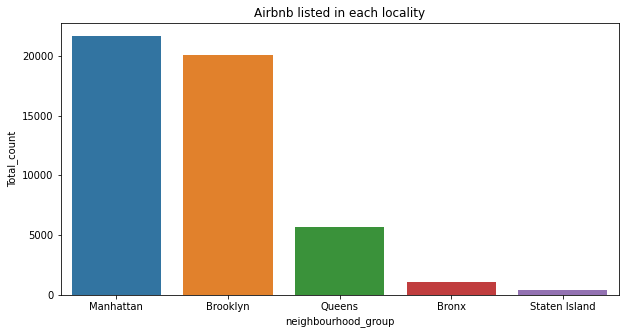

In [16]:
# Using bar plot to visualize the number of postings in each locality
plt.rcParams['figure.figsize'] = (10,5)
axes = sns.barplot(x = count_data['neighbourhood_group'], y = count_data['Total_count'])
axes.set_title('Airbnb listed in each locality')
plt.show()

As shown, Manhatten and Brooklyn are having the most number of airbnb listings while other localities fall quite below.

Mostly there are entire home/apt and private rooms in the dataset

In [17]:
# Host with the most number of listings and their neighbourhood locations.
host_local = a_bnb_new.groupby(['host_name'])['calculated_host_listings_count'].max().reset_index().sort_values(by= ['calculated_host_listings_count'], ascending = False).head(7)
host_local

,host_name,calculated_host_listings_count
9782,Sonder (NYC),327
1357,Blueground,232
5337,Kara,121
5472,Kazuya,103
9781,Sonder,96
4810,Jeremy & Laura,96
2124,Corporate Housing,91


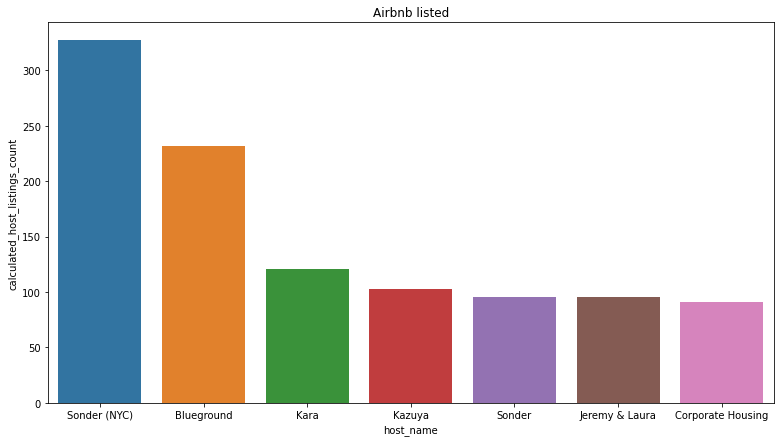

In [18]:
# Bar plot for the top hosts with most number of listings.
plt.rcParams['figure.figsize'] = (13,7)
xy = sns.barplot(x = host_local['host_name'], y = host_local['calculated_host_listings_count'])
xy.set_title('Airbnb listed')
plt.show()

Sonder(NYC) is the host with the most listings, with 327 in Manhattan.

# What can we learn from predictions? (ex: locations, prices, reviews, etc)

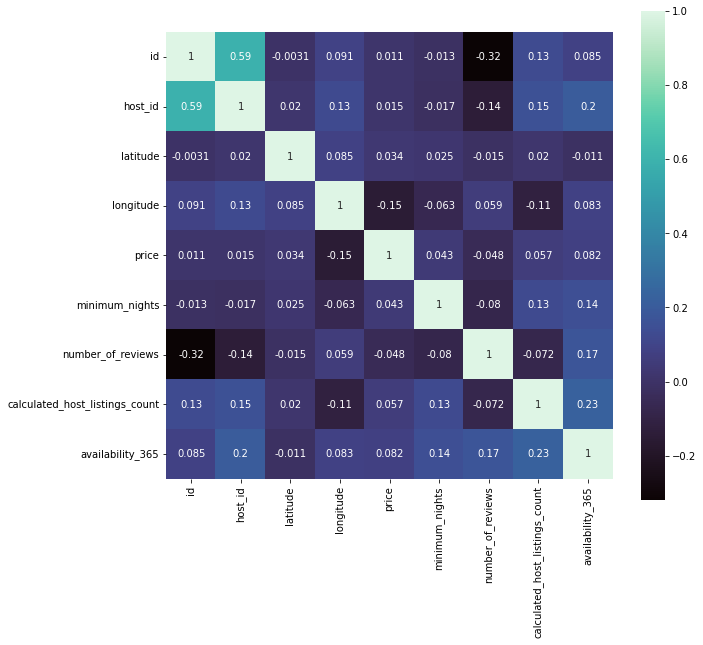

In [19]:
# Correlation matrix of all the numeric values in the dataset
plt.figure(figsize=(10,9))
cor = a_bnb_new.corr()
sns.heatmap(data = cor, square = True, annot = True, cmap = 'mako')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


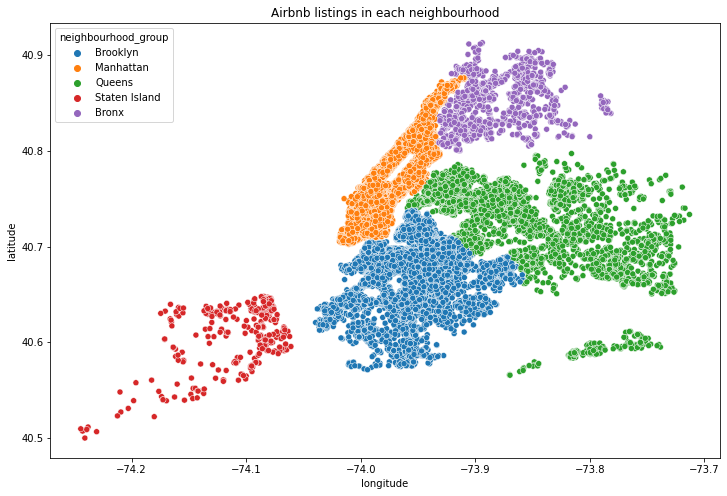

In [20]:
# locations of the listed airbnb properties in each neighbourhood group in NY
plt.figure(figsize = (12,8))
neigh_grp= sns.scatterplot(a_bnb_new.longitude, a_bnb_new.latitude, hue = a_bnb_new.neighbourhood_group).set_title('Airbnb listings in each neighbourhood')
plt.show()

In [21]:
# Property listing based on room type
rcounts = a_bnb_new.groupby(['room_type'])['id'].count().reset_index().rename(columns = {'id':'room_count'}).sort_values(by = 'room_count', ascending =False)
rcounts

,room_type,room_count
0,Entire home/apt,25409
1,Private room,22326
2,Shared room,1160


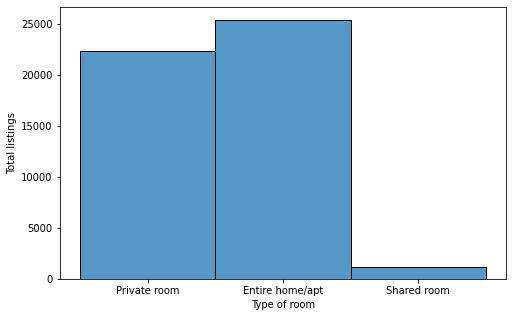

In [22]:
# Visualizing room type and room count data
plt.rcParams['figure.figsize'] = (8,5)
axes_xy = sns.histplot(a_bnb_new['room_type'])
axes_xy.set_xlabel('Type of room')
axes_xy.set_ylabel('Total listings')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


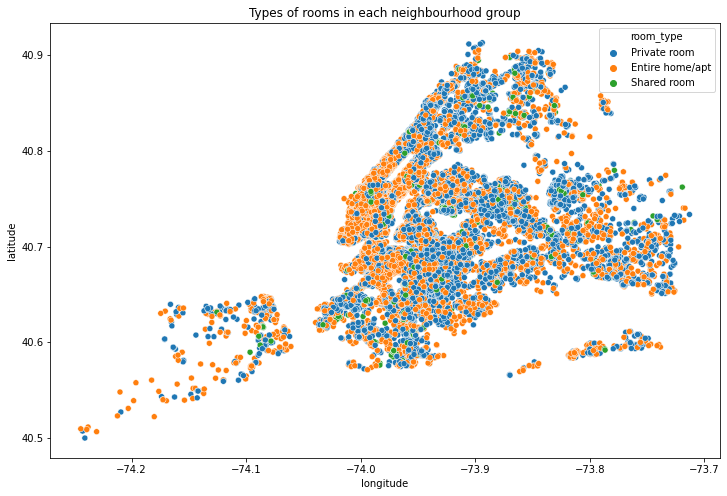

In [23]:
# Types of rooms in each neighbourhood group
plt.figure(figsize = (12,8))
ro_type = sns.scatterplot(a_bnb_new.longitude, a_bnb_new.latitude, hue = a_bnb_new.room_type).set_title('Types of rooms in each neighbourhood group')
plt.show()

In [24]:
# Checking the maximum number of reviews in each neighbourhood
reviews_locale = a_bnb_new.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values(by= 'number_of_reviews', ascending = False)
reviews_locale

,neighbourhood_group,number_of_reviews
3,Queens,629
2,Manhattan,607
1,Brooklyn,488
4,Staten Island,333
0,Bronx,321


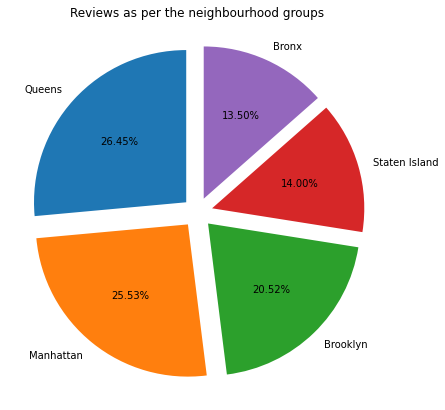

In [25]:
# Pie chart visualisation for the number of reviews in each neighbourhood
plt.subplots(figsize = (7, 7))
reviews = reviews_locale['number_of_reviews']
plt.pie(reviews, labels = reviews_locale['neighbourhood_group'], explode = [0.1, 0.1, 0.1, 0.1, 0.1], startangle = 90, autopct = '%0.2f%%')
plt.title('Reviews as per the neighbourhood groups')
plt.show()

The pie chart above shows the review share % for each neighbourhood category. The bulk of evaluations are in Queens and Manhattan, which suggests that people like these neighbourhoods. Additionally, the majority of the company's revenue is produced in these neighbourhoods.

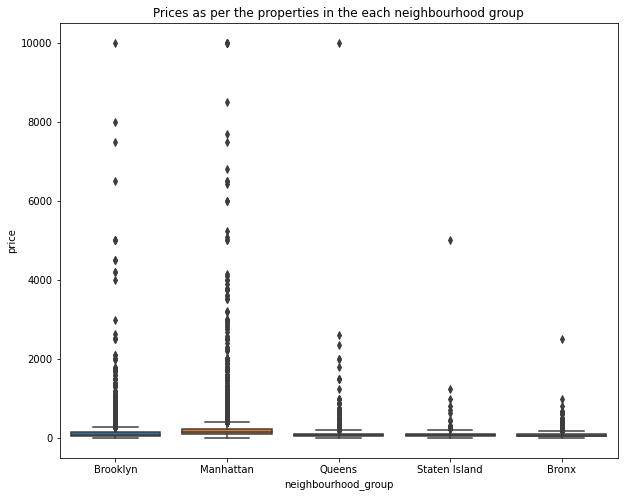

In [26]:
# Prices are based on the properties in each neighbourhood group
x = 'neighbourhood_group'
y = 'price'
plt.subplots(figsize = (10, 8))
sns.boxplot(data = a_bnb_new, x = x, y = y).set_title('Prices as per the properties in the each neighbourhood group')
plt.show()

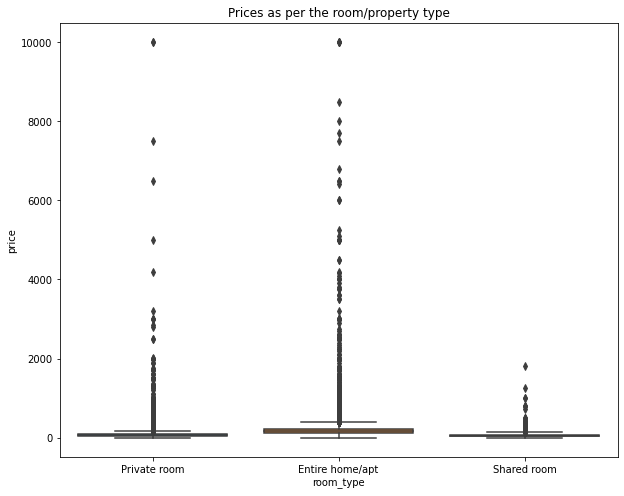

In [27]:
# Prices as per the property type
plt.subplots(figsize=(10, 8))
sns.boxplot(data= a_bnb_new, x='room_type', y='price')
title = 'Prices as per the room/property type'
plt.title(title)
plt.show()

# Which hosts are the busiest and why?

In [28]:
# Hosts with maximum number of reviews are considered as the busiest. 
busy_hosts = a_bnb_new.groupby(['host_id','host_name', 'neighbourhood_group'])['number_of_reviews'].max().reset_index()
busy_hosts = busy_hosts.sort_values(by = 'number_of_reviews', ascending = False).head(7)
busy_hosts

,host_id,host_name,neighbourhood_group,number_of_reviews
23571,47621202,Dona,Queens,629
7385,4734398,Jj,Manhattan,607
21381,37312959,Maya,Queens,543
4386,2369681,Carol,Manhattan,540
18698,26432133,Danielle,Queens,510
13157,12949460,Asa,Brooklyn,488
1872,792159,Wanda,Brooklyn,480


Hosts considered busiest on the basis of maximum number of reviews as people are booking and reviewing them regularly.

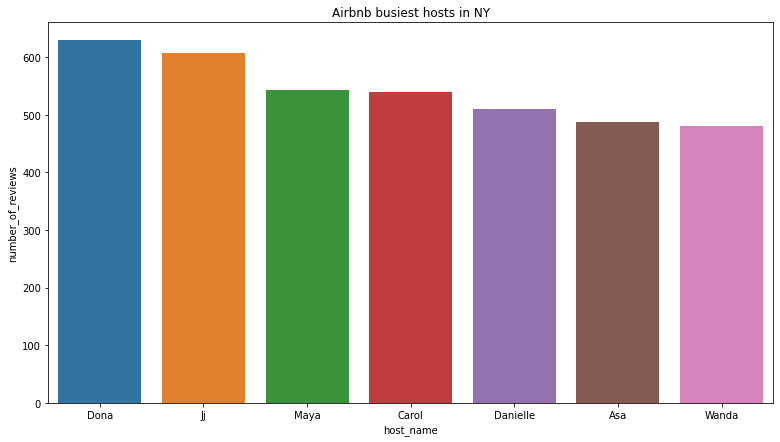

In [29]:
# Bar plot visualization for the busiest hosts in the dataset
plt.rcParams['figure.figsize'] = (13,7)
bsy_hosts = sns.barplot(x = busy_hosts['host_name'], y = busy_hosts['number_of_reviews']).set_title('Airbnb busiest hosts in NY')
plt.show(22)

The top busiest hosts are Dona, Ji, Maya, Carol, Daniella, Asa and Wanda

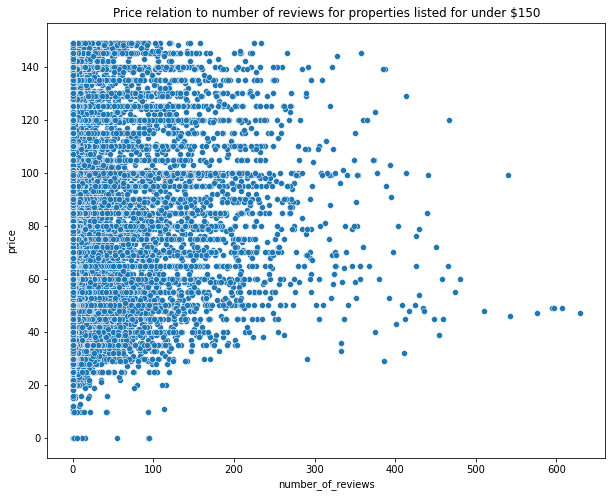

In [30]:
# Price relation to the number of reviews for properties rented under $150
data_filtered = a_bnb_new.loc[a_bnb_new['price'] < 150]
f, ax = plt.subplots(figsize=(10, 8))
xy_axis = sns.scatterplot(x= 'number_of_reviews', y= 'price', data = data_filtered)
title = 'Price relation to number of reviews for properties listed for under $150'
plt.title(title)
plt.show()

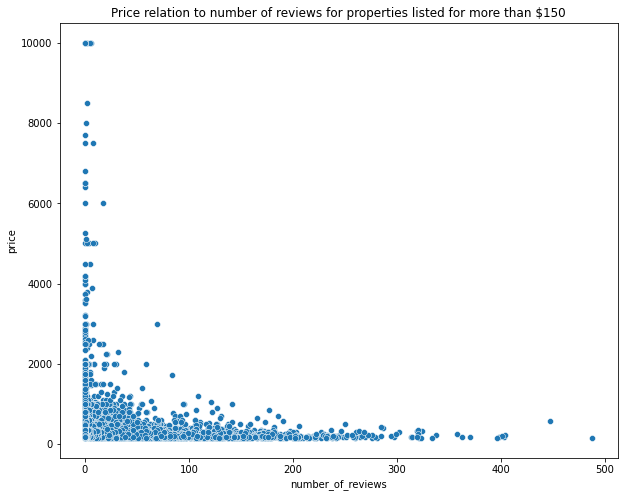

In [31]:
# Price relation to the number of reviews for properties rented more than $150
data_filtered = a_bnb_new.loc[a_bnb_new['price'] > 150]
f, ax = plt.subplots(figsize=(10, 8))
xy_axis = sns.scatterplot(x= 'number_of_reviews', y= 'price', data = data_filtered)
title = 'Price relation to number of reviews for properties listed for more than $150'
plt.title(title)
plt.show()

# Most listed rooms in the neighbourhood

In [32]:
# Top 5 neighbourhoods with most listings
df = a_bnb_new.groupby(['neighbourhood'])['id'].count().nlargest(5)
df

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: id, dtype: int64

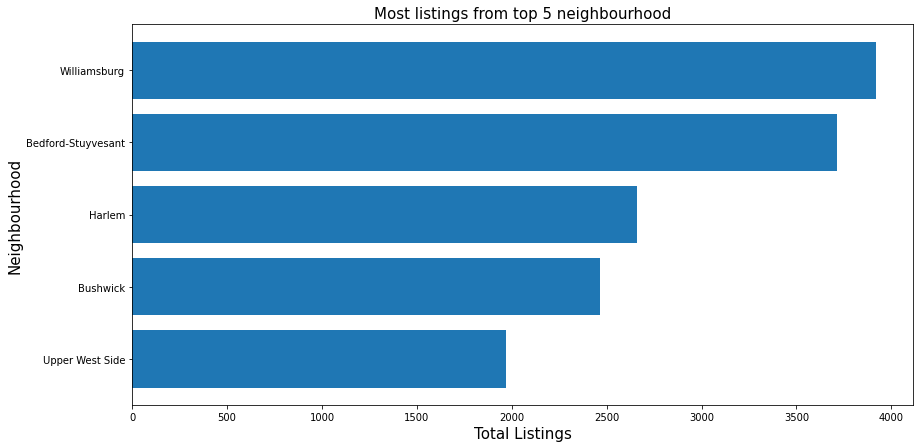

In [33]:
# Top 5 neighbourhood listings through bar plot
plt.figure(figsize=(14,7))
x = list(df.index)
y = list(df.values)
x.reverse()
y.reverse()

plt.title("Most listings from top 5 neighbourhood", {'fontsize':15})
plt.ylabel("Neighbourhood", {'fontsize':15})
plt.xlabel("Total Listings", {'fontsize':15})

plt.barh(x,y)
plt.show()

Given that visitors are more likely to stay in such regions, it seems sense that the neighbourhoods with the highest postings are in Manhattan and Brooklyn. With 3,415 listings, Brooklyn's Williamsburg ranks first. With a total of 2,311 listings, Harlem has the most listings in Manhattan.

# Observations

1. In New York City, 87% of the listings are located in Manhattan and Brooklyn.

2. Brooklyn, Queens, and Manhattan are the boroughs with the most listings. 
3. Staten Island has the fewest listings.
4. People like the neighbourhood groups in Brooklyn and Manhattan.
5. The most popular accommodations are individual rooms and entire homes/apartments. 
6. Less expensive rents are more appealing to people.
7. Compared to Manhattan, Queens has a far smaller number of host listings and therefore, it requires necessary efforts to promote host listings in Queens.

# Conlusion
The data leads us to the conclusion that Manhattan is the neighbourhood with the most listings and the highest rental rates. The prices are significantly higher in this borough since Manhattan is known across the globe for its museums, shops, parks, and theatres, as well as for the large number of tourists it attracts on a year-round basis.

Brooklyn, which has a sizable number of postings and more inexpensive pricing when compared to Manhattan, is the number two neighbourhood group.

There aren't as many listing alternatives accessible for other neighbourhood groups, such as those in Queens, the Bronx, and Staten Island, particularly in Staten Island. Given that those are residential regions, it's conceivable that many visitors opt for them in order to save money or even to see local relatives and friends.

It would have been wonderful to have a few extra features, like positive and negative reviews, for our data exploration purposes. We could have estimated each neighborhood's popularity based on that.